In [24]:
import tensorflow as tf

In [25]:
print(tf.__version__)

2.11.0


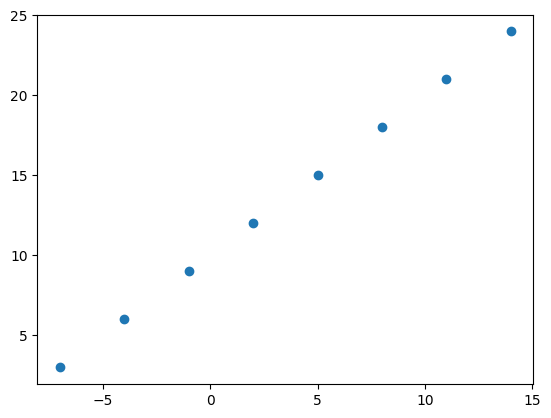

In [26]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y =  np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(X,y)

In [27]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [28]:
# Create  a demo tensor  for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info , house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [29]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [30]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [31]:
input_shape = X[0].shape
output_shape =y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with tensorflow
1. Creating a model 
2. Compiling a model
3. Fitting the model 


In [32]:
#set random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])# sgd is short for stochastic gradient descent
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 305ms/step - loss: 14.0154 - mae: 14.0154
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 13.8829 - mae: 13.8829
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 13.7504 - mae: 13.7504
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 13.6179 - mae: 13.6179
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 13.4854 - mae: 13.4854


In [33]:
# check out X and y]
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [34]:
# Try and make a prediction using trained model
model.predict([17.0]) # ----> doesnt give the proper results so we have to improve the model as the relation between x and y is y=x+10 the answer should have been given as 27 which is way off from the answer we got so we need to improve the model to make better and trustworthy predictions

1/1 [==============================] - 0s 69ms/step


array([[0.5214348]], dtype=float32)

# Improve the model
"""
we can imporve the model by altering the steps we took to create the model
1. creating themod el - increase the number  of hidden units( all called neurons)

2. compiling a model - here we might  change the optimization function or perhaps the learning rate of the optimization function
3. fitting a model here we might fit  a model for more epochs
"""

In [35]:
#set random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])# sgd is short for stochastic gradient descent
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 411ms/step - loss: 17.6863 - mae: 17.6863
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 17.4050 - mae: 17.4050
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 17.1238 - mae: 17.1238
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 16.8425 - mae: 16.8425
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 16.5613 - mae: 16.5613
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 16.2800 - mae: 16.2800
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 15.9988 - mae: 15.9988
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 15.7175 - mae: 15.7175
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 15.4363 - mae: 15.4363
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 15.1550 - mae: 15.1550
Epoch 11/100
1/1 [==============================] - 0s 8m

In [36]:
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[29.540844]], dtype=float32)

In [37]:
#set random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])# sgd is short for stochastic gradient descent
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 1s 560ms/step - loss: 12.9761 - mae: 12.9761
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2755 - mae: 12.2755
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5643 - mae: 11.5643
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8421 - mae: 10.8421
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1079 - mae: 10.1079
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3599 - mae: 9.3599
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5963 - mae: 8.5963
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8144 - mae: 7.8144
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0111 - mae: 7.0111
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7437 - mae: 6.7437
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [38]:
model.predict([1000.0])

1/1 [==============================] - 0s 75ms/step


array([[1020.13794]], dtype=float32)

In [39]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [40]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

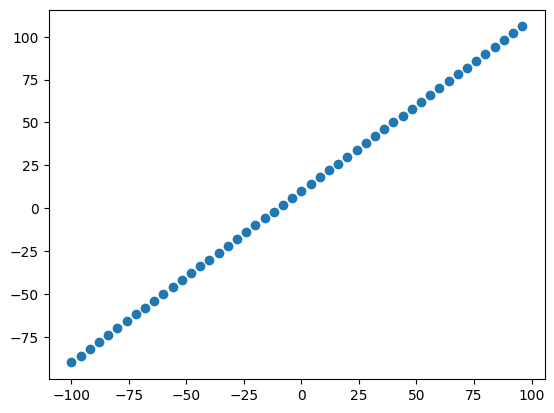

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [42]:
X_train = X[:40]
X_test = X[40:]
len(X_train),len(X_test)

(40, 10)

In [43]:
Y_train = y[:40]
Y_test = y[40:]
len(Y_train),len(Y_test)

(40, 10)

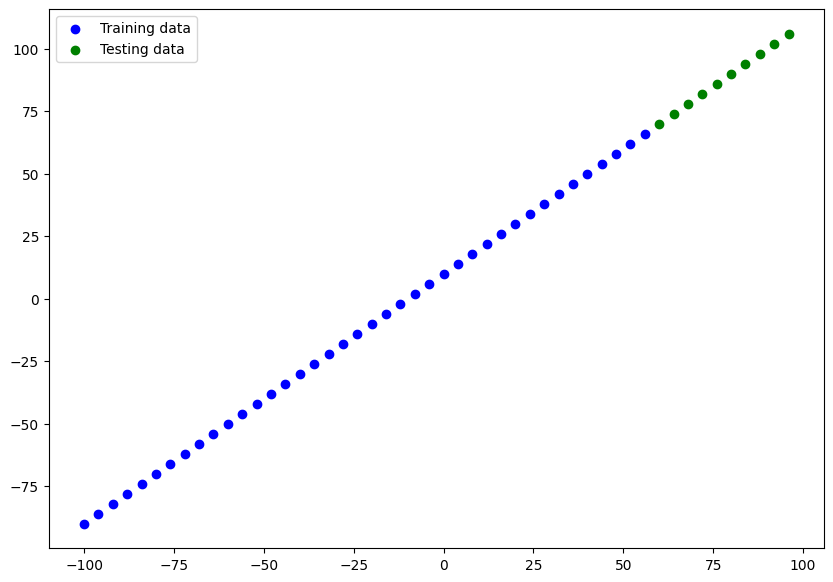

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train,c='b',label='Training data')
plt.scatter(X_test,Y_test,c='g',label='Testing data')
plt.legend()

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
#

In [46]:
#visualizing the model
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [47]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,input_shape=[1],name="output_layer")
],name="model_1")
model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 29.2539 - mae: 29.2539
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 15.6830 - mae: 15.6830
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4789 - mae: 8.4789
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8420 - mae: 11.8420
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6043 - mae: 12.6043
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7514 - mae: 11.7514
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8374 - mae: 9.8374
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6811 - mae: 7.6811
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2800 - mae: 8.2800
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4332 - mae: 7.4332
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - los

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.utils import plot_model
import pydot

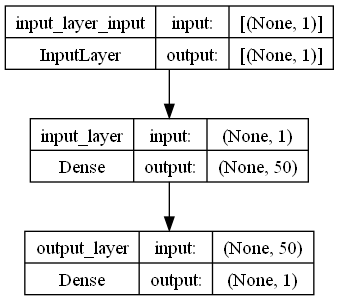

In [51]:
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

In [52]:
#make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[64.31659 ],
       [67.943634],
       [71.57067 ],
       [75.19773 ],
       [78.82477 ],
       [82.45181 ],
       [86.078865],
       [89.7059  ],
       [93.33295 ],
       [96.95999 ]], dtype=float32)

In [53]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [54]:
def plot_predictions(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',label='training data')
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    plt.scatter(test_data,predictions,c='r',label='Predictions')
    plt.legend()

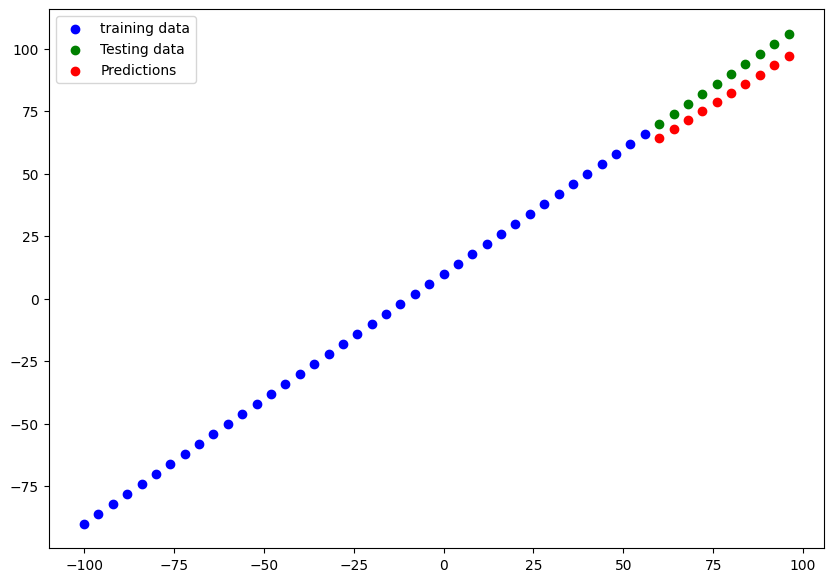

In [55]:
plot_predictions()

In [56]:
# Evaluate the model 
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 125ms/step - loss: 7.3617 - mae: 7.3617


[7.361710548400879, 7.361710548400879]

In [57]:
y_pred

array([[64.31659 ],
       [67.943634],
       [71.57067 ],
       [75.19773 ],
       [78.82477 ],
       [82.45181 ],
       [86.078865],
       [89.7059  ],
       [93.33295 ],
       [96.95999 ]], dtype=float32)

In [58]:
mae=tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([23.68341 , 20.056366, 16.743464, 14.081362, 12.070093, 10.709638,
       10.      , 10.      , 10.66659 , 11.983996], dtype=float32)>

In [59]:
y_pred=tf.constant(y_pred )
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[64.31659 ],
       [67.943634],
       [71.57067 ],
       [75.19773 ],
       [78.82477 ],
       [82.45181 ],
       [86.078865],
       [89.7059  ],
       [93.33295 ],
       [96.95999 ]], dtype=float32)>

In [60]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [61]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([64.31659 , 67.943634, 71.57067 , 75.19773 , 78.82477 , 82.45181 ,
       86.078865, 89.7059  , 93.33295 , 96.95999 ], dtype=float32)>

In [62]:
def mae(Y_test,y_pred):
    mae=tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=(y_pred))
    return mae
def mse(Y_test,y_pred):
    mse=tf.metrics.mean_squared_error(y_true=Y_test,y_pred=(y_pred))
    return mse


In [63]:
mae=mae(Y_test,y_pred)
print(mae)

tf.Tensor(
[23.68341  20.056366 16.743464 14.081362 12.070093 10.709638 10.
 10.       10.66659  11.983996], shape=(10,), dtype=float32)


### Experimenting with 3 models ###
1. One layer with 100 epochs
2. Two layers with 100 epochs
3. Two layers with 500 epochs
**we will see and analyze which of the following model gives us the least error and the closest to accurate results and predictions**

In [64]:
# tf.random.set_seed(42)
# model_1=tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])
# model_1.compile(tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])
# model_1.fit(X_train,Y_train,epochs=100)
#set random seed
tf.random.set_seed(42)
# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])# sgd is short for stochastic gradient descent
# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 26.6730 - mae: 26.6730
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3531 - mae: 9.3531
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6403 - mae: 7.6403
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7790 - mae: 9.7790
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0263 - mae: 11.0263
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1859 - mae: 10.1859
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2022 - mae: 9.2022
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1375 - mae: 9.1375
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7493 - mae: 11.7493
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6688 - mae: 13.6688
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - los

1/1 [==============================] - 0s 37ms/step


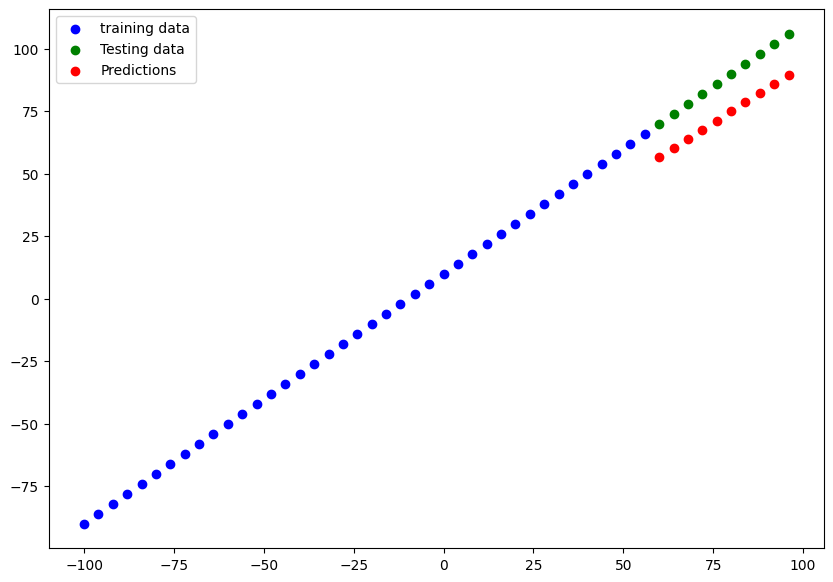

In [65]:
# Make and plot preictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [66]:
mae_1=mae(Y_test,tf.squeeze(y_preds_1))

mse_1=mse(Y_test,tf.squeeze(y_preds_1))
mae_1,mse_1

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

### building model 2 ###

In [67]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
# model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 37.6764 - mae: 37.6764
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 29.6479 - mae: 29.6479
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 35.1663 - mae: 35.1663
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 25.3086 - mae: 25.3086
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9683 - mae: 14.9683
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.9090 - mae: 11.9090
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2397 - mae: 11.2397
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1299 - mae: 11.1299
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.7916 - mae: 40.7916
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.1428 - mae: 28.1428
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [68]:
y_preds_2=model.predict(X_test)
y_preds_2

1/1 [==============================] - 0s 36ms/step


array([[64.31659 ],
       [67.943634],
       [71.57067 ],
       [75.19773 ],
       [78.82477 ],
       [82.45181 ],
       [86.078865],
       [89.7059  ],
       [93.33295 ],
       [96.95999 ]], dtype=float32)

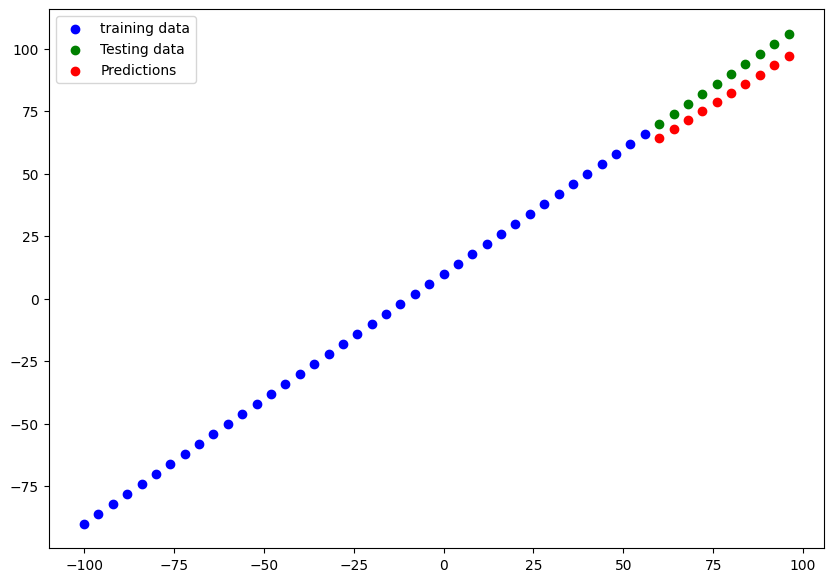

In [69]:
plot_predictions(predictions=y_preds_2)

In [70]:
mae_2=mae(Y_test,tf.squeeze(y_preds_2))
print(mae_2)
mae_2=tf.metrics.mean_absolute_error(Y_test,tf.squeeze(y_preds_2))
print(mae_2)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

### Building model_3 ###

In [71]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
# model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 29.0940 - mae: 29.0940
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 23.1879 - mae: 23.1879
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.2553 - mae: 29.2553
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 23.7567 - mae: 23.7567
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.1464 - mae: 14.1464
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.3051 - mae: 11.3051
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.3135 - mae: 12.3135
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 10.9162 - mae: 10.9162
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 38.3284 - mae: 38.3284
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.8634 - mae: 25.8634
Epoch 11/500
2/2 [==============================] - 0s 5ms/

In [72]:
y_preds_3=model.predict(X_test)
y_preds_3

1/1 [==============================] - 0s 25ms/step


array([[64.31659 ],
       [67.943634],
       [71.57067 ],
       [75.19773 ],
       [78.82477 ],
       [82.45181 ],
       [86.078865],
       [89.7059  ],
       [93.33295 ],
       [96.95999 ]], dtype=float32)

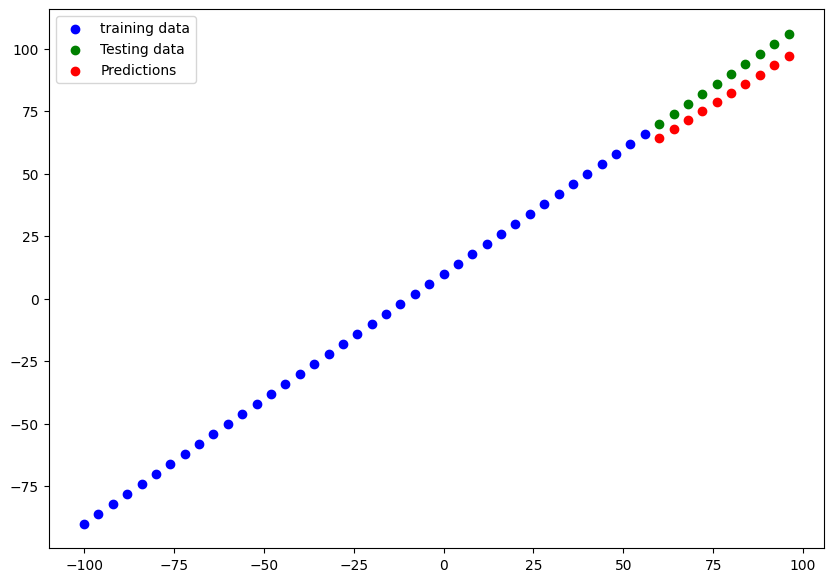

In [73]:
plot_predictions(predictions=y_preds_3)

In [76]:
# saving  model normally
model_2.save('best_model_first')

INFO:tensorflow:Assets written to: best_model_first\assets


INFO:tensorflow:Assets written to: best_model_first\assets


In [77]:
model_2.save("best_model_HDF5_format.h5")

# Loading in a saved model

In [79]:
# Load in the savedmoedl
loaded_savedmodel_format= tf.keras.models.load_model(r"C:\Python\Deep_Learning\Personal\best_model_first")
loaded_savedmodel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_2.predict(X_test)==loaded_savedmodel_format.predict(X_test)

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [81]:
loaded_savedmodel_format.predict([14.0])

1/1 [==============================] - 0s 111ms/step


array([[19.038116]], dtype=float32)

# Training First Kaggle dataset

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
# Creating a training and test  set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X),len(X_test)

(1070, 1338, 268)

In [15]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,metrics=["mae"])
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8724.3398 - mae: 8724.3398
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7845.7944 - mae: 7845.7944
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.5190 - mae: 7551.5190
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7780.6758 - mae: 7780.6758
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7680.1450 - mae: 7680.1450
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7651.6299 - mae: 7651.6299
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7686.2432 - mae: 7686.2432
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7742.8442 - mae: 7742.8442
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.2095 - mae: 7574.2095
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7767.9702 - mae: 7767.9702

In [16]:
# Check the results of the insurance modell
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8711.6953 - mae: 8711.6953


[8711.6953125, 8711.6953125]

In [54]:
# Improve  the model
from tensorflow.keras.callbacks import EarlyStopping
## !EARLY STOPPING CALL BACK CHECKS  FOR THE GIVEN AMOUNT OF PATIENCE AND IF THE MODEL IS NOT PERFORMING BETTER AND THE MAE OR MSE IS NOT DECREASING IT STOPS THE TRAINING IN THIS WAY YOU GET THE BEST MODEL
##! PATIENCE IS THE NUMBER OF EPOCHS TO CHECK FOR IMPROVEMENT WE CAN INCREASE THE PATIENCE TO GET THE BEST MODEL DEPENDING ON THE DATASET AS THE DATASET HERE WAS SMALL SO WE USED 10
tf.random.set_seed(42)
es = EarlyStopping(monitor='loss', patience=20)
insurance_model_2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.mae,metrics=["mae"])
history = insurance_model_2.fit(X_train,y_train,epochs=200,callbacks=[es])


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 11510.6865 - mae: 11510.6865
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7497.6577 - mae: 7497.6577
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7282.7036 - mae: 7282.7036
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7046.8857 - mae: 7046.8857
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6801.7549 - mae: 6801.7549
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6532.7051 - mae: 6532.7051
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6388.7090 - mae: 6388.7090
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6227.8555 - mae: 6227.8555
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6071.2373 - mae: 6071.2373
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5867.2959 - mae: 5867.29

In [55]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.0452 - mae: 3169.0452


[3169.045166015625, 3169.045166015625]

Text(0.5, 0, 'epochs')

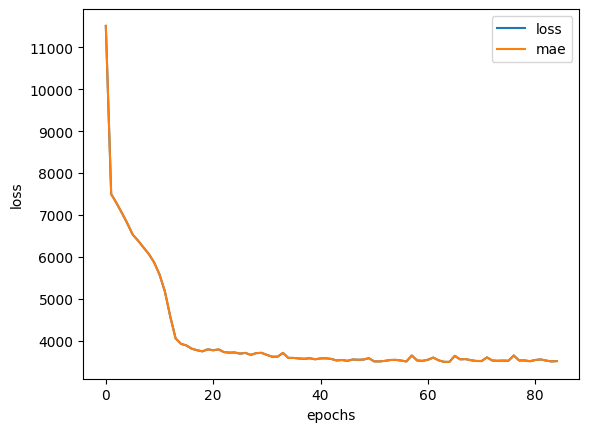

In [57]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [58]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

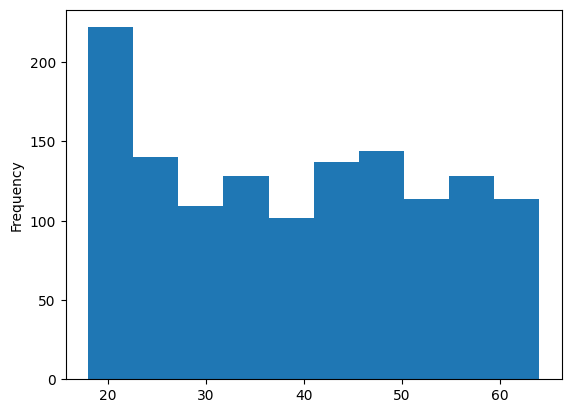

In [59]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

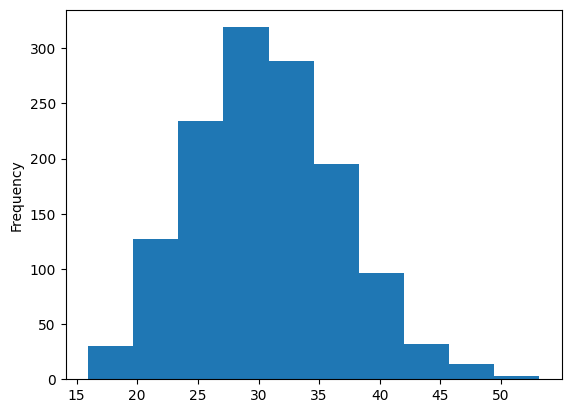

In [60]:
X["bmi"].plot(kind="hist")

In [62]:
X["children"].value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64